In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from keras.models import load_model
from random import randint
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [ ]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)                                                                                  
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


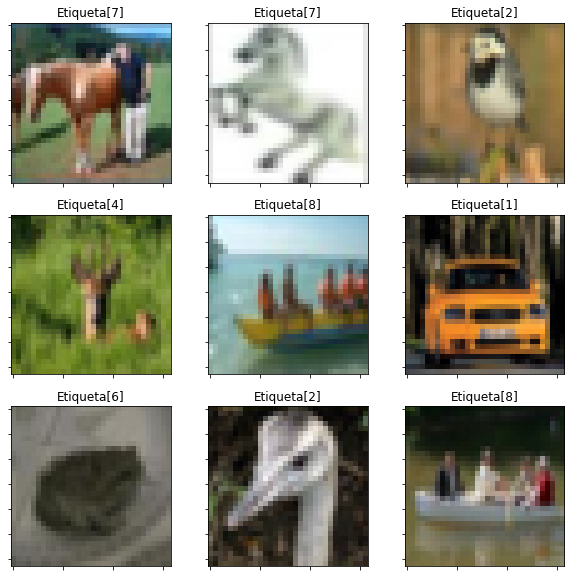

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  index = randint(0,len(x_train)-1)
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[index], cmap='gray')
  plt.gca().set_yticklabels([])
  plt.gca().set_xticklabels([])
  plt.gca().set_title('Etiqueta' + str(y_train[index]))
plt.show()

In [ ]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [ ]:
num_classes = 10
Y_train = keras.utils.to_categorical(y_train,num_classes)
Y_test = keras.utils.to_categorical(y_test,num_classes)

print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
modelo_base = keras.applications.ResNet50(include_top=False,
                                          weights='imagenet',
                                          input_tensor= LK.Input(shape=(32,32,3)))

In [ ]:
entrada = modelo_base.output
# conv1 = LK.Conv2D(6,5,padding='same',activation = 'relu')(entrada)
# pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
# conv2 = LK.Conv2D(16,5,padding='same', activation = 'relu')(pool1)
# pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(entrada)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)
Cifar10 = MK.Model(inputs=modelo_base.input,outputs=salida)

Cifar10.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
modelo_base.trainable = False

In [ ]:
Cifar10.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
history = Cifar10.fit(x_train,y_train,epochs=20,batch_size=128, validation_data=(x_test,y_test),verbose=1)
loss,acc = Cifar10.evaluate(x_test,y_test,verbose=1)
print(loss, acc)

Epoch 1/20


ValueError: ignored

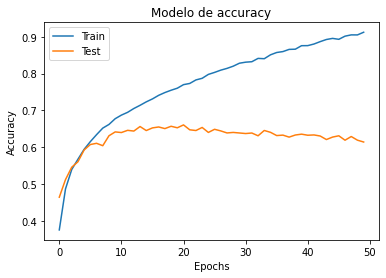

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

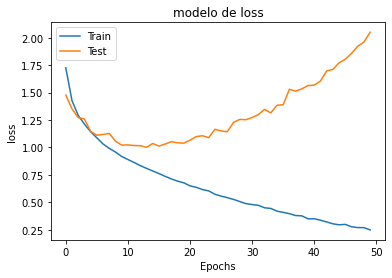

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
entrada = LK.Input(shape=(32,32,3))
conv1 = LK.Conv2D(6,5,padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(0.01))(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='same', activation = 'relu', kernel_regularizer=regularizers.L2(0.01))(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu',kernel_regularizer=regularizers.L2(0.01))(flat)
fc2 = LK.Dense(84,activation='relu',kernel_regularizer=regularizers.L2(0.01))(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)
Cifar10_L2 = MK.Model(entrada,salida)

Cifar10_L2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

In [ ]:
Cifar10_L2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
history = Cifar10_L2.fit(x_train,y_train,epochs=50,batch_size=128, validation_data=(x_test,y_test),verbose=1)
loss,acc = Cifar10_L2.evaluate(x_test,y_test,verbose=1)
print(loss, acc)

Epoch 1/50
391/391 [==============================] - 7s 13ms/step - loss: 2.2691 - accuracy: 0.3267 - val_loss: 1.8592 - val_accuracy: 0.4085
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 1.7955 - accuracy: 0.4186 - val_loss: 1.7384 - val_accuracy: 0.4331
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7103 - accuracy: 0.4517 - val_loss: 1.7056 - val_accuracy: 0.4400
Epoch 4/50
391/391 [==============================] - 5s 13ms/step - loss: 1.6591 - accuracy: 0.4726 - val_loss: 1.6259 - val_accuracy: 0.4834
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6129 - accuracy: 0.4938 - val_loss: 1.6051 - val_accuracy: 0.4972
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5821 - accuracy: 0.5073 - val_loss: 1.5698 - val_accuracy: 0.5119
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5599 - accuracy: 0.5159 - val_loss: 1.5689 - val_accuracy: 0.5050
Epo

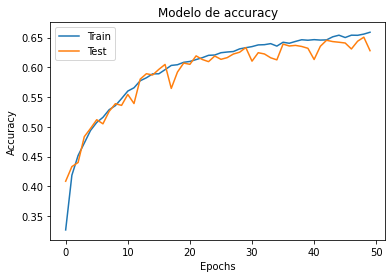

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

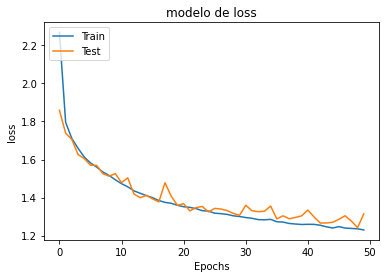

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array   
import tensorflow as tf

In [ ]:
cifar10 = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) =cifar10.load_data()

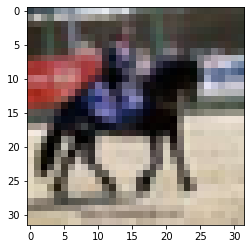

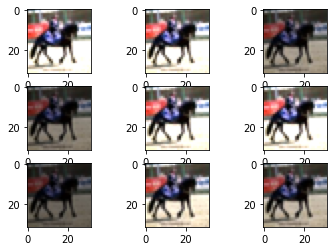

In [ ]:
plt.imshow(tf.squeeze(X_test[5000]))
plt.show()
x = np.array([X_test[5000]])
datagen = ImageDataGenerator(brightness_range=[0.4,1.5],fill_mode='uniform')
it = datagen.flow(x,batch_size=1)
for i in range(9):
  plt.subplot(330+1+i)
  batch = it.next()
  image = tf.squeeze(batch[0].astype('uint8'))
  plt.imshow(image)

plt.show()

In [ ]:
import tensorflow as tf 
tf.keras.backend.clear_session()

In [ ]:
entrada = LK.Input(shape=(32,32,3))
conv1 = LK.Conv2D(6,5,padding='same',activation = 'relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='same', activation = 'relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)
Cifar10_da = MK.Model(entrada,salida)

Cifar10_da.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

In [ ]:
Cifar10_da.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
num_classes = 10
y_train_ohe = keras.utils.to_categorical(y_train,num_classes)
y_test_ohe = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(x_train)
iterator = datagen.flow(x_train,y_train_ohe, batch_size=64)
muestras = x_train.shape[0] // 64

In [ ]:
history = Cifar10_da.fit(iterator,steps_per_epoch=muestras, epochs=50, validation_data=(x_test,y_test_ohe),verbose=1)
loss,acc = Cifar10_da.evaluate(x_test,y_test_ohe,verbose=1)
print(loss, acc)

Epoch 1/50
781/781 [==============================] - 33s 40ms/step - loss: 1.7788 - accuracy: 0.3426 - val_loss: 1.5316 - val_accuracy: 0.4507
Epoch 2/50
781/781 [==============================] - 30s 39ms/step - loss: 1.5694 - accuracy: 0.4292 - val_loss: 1.5400 - val_accuracy: 0.4558
Epoch 3/50
781/781 [==============================] - 30s 38ms/step - loss: 1.4890 - accuracy: 0.4579 - val_loss: 1.4695 - val_accuracy: 0.4714
Epoch 4/50
781/781 [==============================] - 31s 39ms/step - loss: 1.4293 - accuracy: 0.4828 - val_loss: 1.3081 - val_accuracy: 0.5331
Epoch 5/50
781/781 [==============================] - 30s 39ms/step - loss: 1.3747 - accuracy: 0.5036 - val_loss: 1.2466 - val_accuracy: 0.5529
Epoch 6/50
781/781 [==============================] - 31s 40ms/step - loss: 1.3382 - accuracy: 0.5181 - val_loss: 1.2134 - val_accuracy: 0.5659
Epoch 7/50
781/781 [==============================] - 30s 39ms/step - loss: 1.3072 - accuracy: 0.5315 - val_loss: 1.2182 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
mc = ModelCheckpoint('bestweights.h5',monitor='val_accuracy',save_best_only=True,mode='max')
cnn = Cifar10_L2.fit(x_train,y_train,epochs=50,batch_size=64, validation_data=(x_test,y_test),callbacks=[mc],verbose=1)

Epoch 1/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2968 - accuracy: 0.6319 - val_loss: 1.3035 - val_accuracy: 0.6323
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.2848 - accuracy: 0.6370 - val_loss: 1.3940 - val_accuracy: 0.5934
Epoch 3/50
782/782 [==============================] - 4s 6ms/step - loss: 1.2818 - accuracy: 0.6349 - val_loss: 1.2947 - val_accuracy: 0.6287
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2718 - accuracy: 0.6413 - val_loss: 1.3412 - val_accuracy: 0.6156
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 1.2770 - accuracy: 0.6405 - val_loss: 1.3597 - val_accuracy: 0.6168
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2746 - accuracy: 0.6406 - val_loss: 1.3074 - val_accuracy: 0.6373
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - loss: 1.2699 - accuracy: 0.6403 - val_loss: 1.2831 - val_accuracy: 0.6428
Epoch 